###Task 1: Download the dataset from drive link given below and split them into Training and Validation Sets

#Importing Libraries 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import keras
import tensorflow
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras.preprocessing import image
%matplotlib inline

##Extracting the Files from the Folder

In [3]:
!unzip /content/drive/MyDrive/charts.zip -d /content/

Archive:  /content/drive/MyDrive/charts.zip
   creating: /content/charts/
   creating: /content/charts/test/
  inflating: /content/charts/test/0.png  
  inflating: /content/charts/test/1.png  
  inflating: /content/charts/test/10.png  
  inflating: /content/charts/test/11.png  
 extracting: /content/charts/test/12.png  
 extracting: /content/charts/test/13.png  
  inflating: /content/charts/test/14.png  
  inflating: /content/charts/test/15.png  
  inflating: /content/charts/test/16.png  
  inflating: /content/charts/test/17.png  
  inflating: /content/charts/test/18.png  
  inflating: /content/charts/test/19.png  
  inflating: /content/charts/test/2.png  
  inflating: /content/charts/test/20.png  
  inflating: /content/charts/test/21.png  
  inflating: /content/charts/test/22.png  
  inflating: /content/charts/test/23.png  
  inflating: /content/charts/test/24.png  
  inflating: /content/charts/test/25.png  
  inflating: /content/charts/test/26.png  
  inflating: /content/charts/test/

In [4]:
#Reading the training values and storing it in dataframe

train=pd.read_csv('/content/charts/train_val.csv')
train.head()    # printing first five rows of the file


,image_index,type
0,0,vbar_categorical
1,1,vbar_categorical
2,2,vbar_categorical
3,3,vbar_categorical
4,4,vbar_categorical


In [5]:
#Reading the testing values and storing it in dataframe

test=pd.read_csv('/content/charts/test.csv')
test.head()    # printing first five rows of the file

,image_index,type
0,0,vbar_categorical
1,1,hbar_categorical
2,2,vbar_categorical
3,3,vbar_categorical
4,4,line


In [6]:
#Appending / and png to match the image format
train['image_index']='/'+train['image_index'].astype(str)+'.png'
train.head()

,image_index,type
0,/0.png,vbar_categorical
1,/1.png,vbar_categorical
2,/2.png,vbar_categorical
3,/3.png,vbar_categorical
4,/4.png,vbar_categorical


In [7]:
#Appending string and png to match the image format

test['image_index']='/'+test['image_index'].astype(str)+'.png'
test.head()

,image_index,type
0,/0.png,vbar_categorical
1,/1.png,hbar_categorical
2,/2.png,vbar_categorical
3,/3.png,vbar_categorical
4,/4.png,line


In [8]:
#Concatenating the path of image 

train['image_index']='/content/charts/train_val'+train['image_index']
train.head()

,image_index,type
0,/content/charts/train_val/0.png,vbar_categorical
1,/content/charts/train_val/1.png,vbar_categorical
2,/content/charts/train_val/2.png,vbar_categorical
3,/content/charts/train_val/3.png,vbar_categorical
4,/content/charts/train_val/4.png,vbar_categorical


In [9]:
#Concatenating the path of image 


test['image_index']='/content/charts/train_val'+test['image_index']
test.head()

,image_index,type
0,/content/charts/train_val/0.png,vbar_categorical
1,/content/charts/train_val/1.png,hbar_categorical
2,/content/charts/train_val/2.png,vbar_categorical
3,/content/charts/train_val/3.png,vbar_categorical
4,/content/charts/train_val/4.png,line


In [10]:
# sort label
labels = train.sort_values('type')
labels.head()

,image_index,type
999,/content/charts/train_val/999.png,dot_line
871,/content/charts/train_val/871.png,dot_line
870,/content/charts/train_val/870.png,dot_line
869,/content/charts/train_val/869.png,dot_line
868,/content/charts/train_val/868.png,dot_line


In [11]:
# take unique labels
class_names = list(labels.type.unique())
class_names

['dot_line', 'hbar_categorical', 'line', 'pie', 'vbar_categorical']

In [12]:
# take unique labels
class_test_names = list(test['type'].unique())
class_test_names

['vbar_categorical', 'hbar_categorical', 'line', 'dot_line', 'pie']

In [13]:
#creating a new root directory for training set

import shutil, os
newpath = r'./train_labels' 
if not os.path.exists(newpath):
    os.makedirs(newpath)

In [14]:
#creating subfolders for training set
for c in class_names:
    dest =  r'./train_labels/'+str(c)
    os.makedirs(dest)
    for i in list(labels[labels['type']==c]['image_index']): # Image Id
        get_image = os.path.join('/content/charts/train_val', i) # Path to Images 
        move_image_to_cat = shutil.copy(get_image, dest)  

In [15]:
#creating a new root directory for test set

import shutil, os
newpath = r'./test_labels' 
if not os.path.exists(newpath):
    os.makedirs(newpath)

In [16]:
#creating subfolders for testing set
for c in class_test_names:
    dest =  r'./test_labels/'+str(c)
    os.makedirs(dest)
    for i in list(test[test['type']==c]['image_index']): # Image Id
        get_image = os.path.join('/content/charts/test', i) # Path to Images 
        move_image_to_cat = shutil.copy(get_image, dest)  

In [17]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [18]:
#Defining parameters 

BATCH_SIZE = 32
IMAGE_SIZE = 227
CHANNELS=3
EPOCHS=50

In [19]:
#creates a dataset of labeled trained images by reading images from a directory on disk.
#shuffling and resizing of the images, and batching of the data for training

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "train_labels",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 1000 files belonging to 5 classes.


In [20]:
#creates a dataset of labeled test images by reading images from a directory on disk.
##shuffling and resizing of the images, and batching of the data for test set


test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "test_labels",
    seed=123,
    shuffle=False,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 50 files belonging to 5 classes.


In [21]:
#Printing the class names of train set
class_train_names = train_dataset.class_names
class_train_names

['dot_line', 'hbar_categorical', 'line', 'pie', 'vbar_categorical']

In [22]:
#Printing the class names of test set
class_test_names = test_dataset.class_names
class_test_names

['dot_line', 'hbar_categorical', 'line', 'pie', 'vbar_categorical']

In [23]:
for image_batch, labels_batch in train_dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 227, 227, 3)
[2 3 2 1 0 1 4 4 4 1 1 3 3 2 4 4 1 1 1 1 3 1 4 1 3 0 2 4 3 3 2 4]


# Visualizing Some Images

 Visualizing the First batch of Images

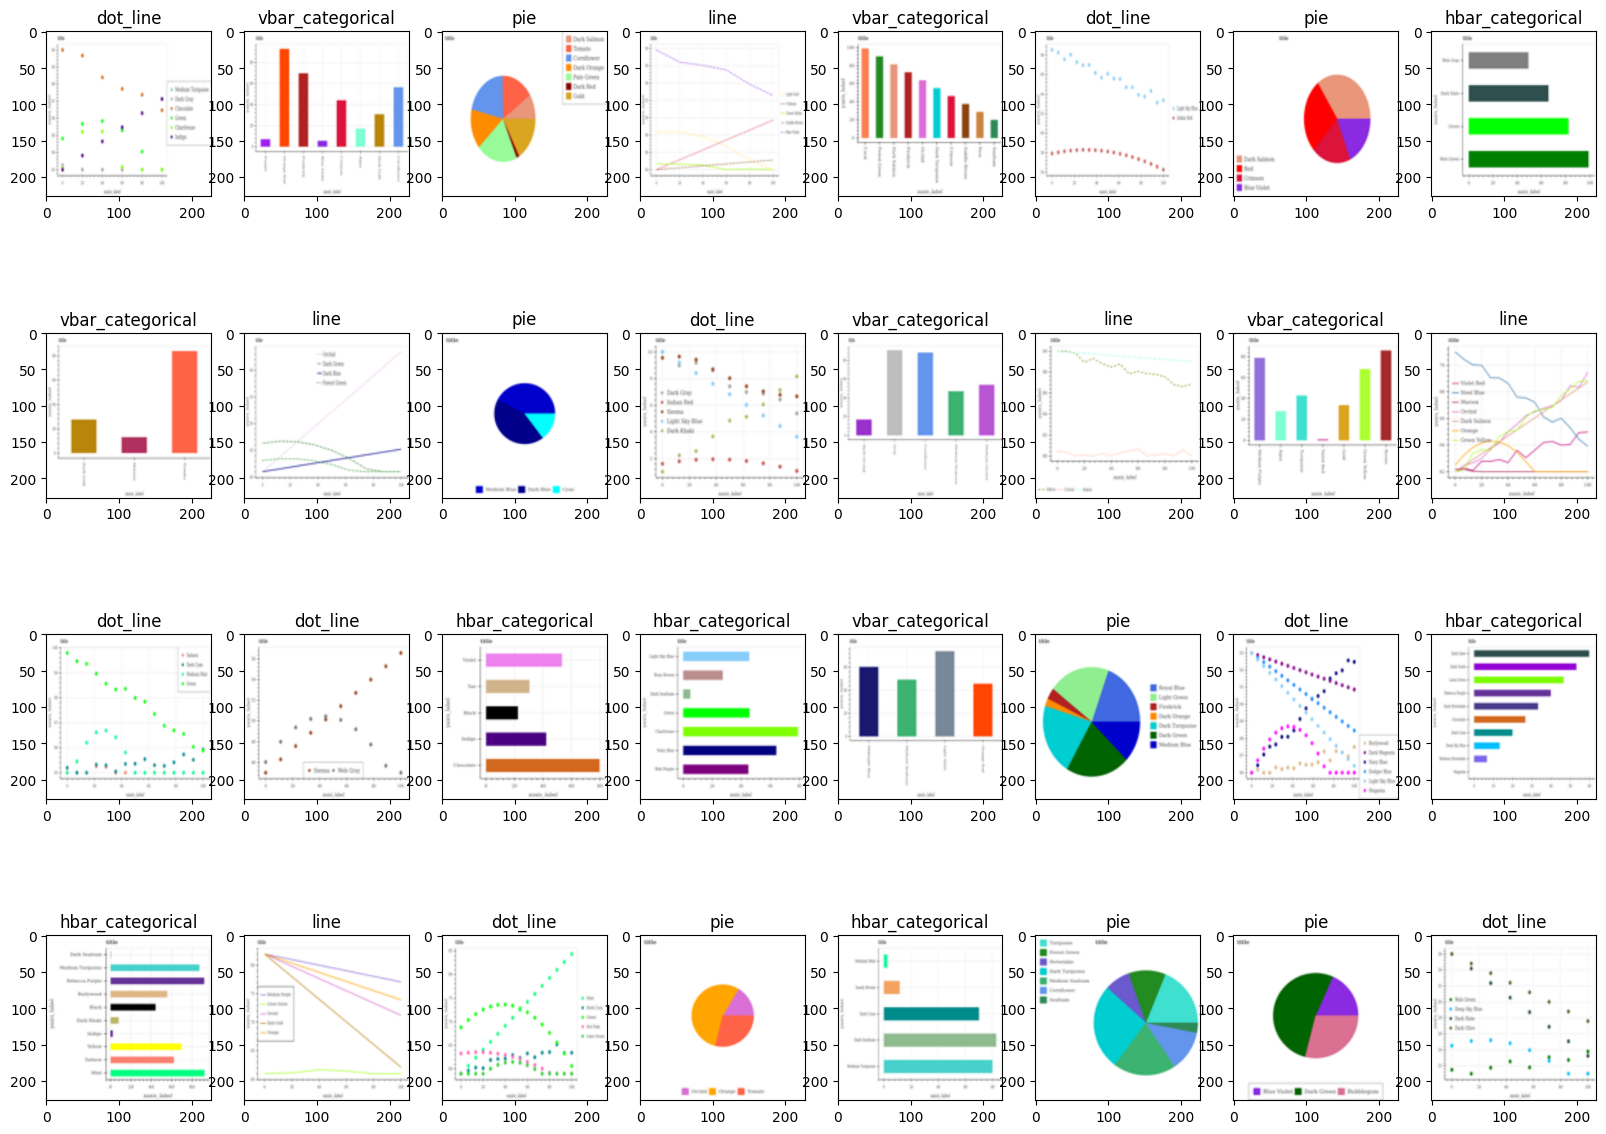

In [24]:
plt.figure(figsize=(20,15))
for image_batch, labels_batch in train_dataset.take(1):
    for i in range(BATCH_SIZE):
        ax = plt.subplot(4, 8, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        



*   Here first batch of images are displayed along with their actual labels



#Task 1:Upload the Dataset 


*   Split train and val images for training and validation in an appropriate ratio (e.g., 80% for
training and 20 % for validating).





##Function to Split Dataset
Dataset should be bifurcated into 3 subsets, namely:

Training: Dataset to be used while training

1.   Training: Dataset to be used while training
2.   Validation: Dataset to be tested against while training


In [25]:
len(train_dataset)

32

In [26]:
train_size = 0.8
len(train_dataset)*train_size

25.6

In [27]:
train_ds = train_dataset.take(26)
len(train_ds)

26

In [28]:
remaining_ds = train_dataset.skip(26)
len(remaining_ds)


6

In [29]:
val_size=0.2
len(train_dataset)*val_size

6.4

In [30]:
val_ds = remaining_ds.take(6)
len(val_ds)


6

Inference:



*   Batch size: 32

*   Training set:   25 (80% )

*   Validation Set: 6  (20%)



In [31]:
 #Function to split  into a training(80%)and validation set (20%)

def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.2, shuffle=True, shuffle_size=10000):
    assert (train_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(round((train_split * ds_size)))
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    
    
    return train_ds, val_ds

In [32]:
train_ds, val_ds = get_dataset_partitions_tf(train_dataset)

In [33]:
len(train_ds)

26

In [34]:
len(val_ds)

6

#Data Augmentation

Data augmentation is a technique to increase the diversity of data by applying random transformations, such as flipping, rotating, or shifting, to the original dataset.

In [35]:
#The resize_and_rescale object is a sequential model that resizes images to IMAGE_SIZE and scales their pixel values to a range of [0,1].

resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [36]:
# data augmentation pipeline using Keras Sequential API that includes random horizontal and vertical flipping and random rotation of the input images with a maximum angle of 0.2 radians.

data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
  
])

In [37]:
#Applying data augmentation for test

data_augmentation_test = tf.keras.Sequential([
 
  
])

In [38]:
#mapping training set to data augmentation

train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
)



In [39]:
##mapping testing set to data augmentation

test_ds = train_dataset.map(
    lambda x, y: (data_augmentation_test(x), y)
)


In [40]:
train_ds

<_MapDataset element_spec=(TensorSpec(shape=(None, 227, 227, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [41]:
for images, labels in train_ds:
    # `images` will contain a batch of preprocessed image tensors
    # `labels` will contain a batch of label tensors
    # You can apply one-hot encoding to `labels` using the `to_categorical` function from Keras
    train_images=images
    train_labels = to_categorical(labels, num_classes=5) #No of classes


for images, labels in val_ds:
    # `images` will contain a batch of preprocessed image tensors
    # `labels` will contain a batch of label tensors
    # You can apply one-hot encoding to `labels` using the `to_categorical` function from Keras
    val_images=images
    val_labels = to_categorical(labels, num_classes=5) #No of classes

In [42]:
train_labels

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

#TASK 3 : Implement AlexNet Architecture

In [43]:
import keras
from keras.models import Sequential
#Sequential from keras.models,
#This gets our neural network as Sequential network.
# As we know, it can be sequential layers or graph
from keras. layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
#Importing, Dense, Activation, Flatten, Activation, Dropout, Conv2D and Maxpooling.
#Dropout is a technique used to prevent a model from overfitting.
from keras.layers import BatchNormalization
#For normalization.
import numpy as np
image_shape = (227,227,3)
np.random.seed (1000)

In [44]:

# (3) Create a sequential model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=image_shape, kernel_size=(11,11),strides=(4,4), padding='valid'))
model.add(Activation('relu'))

# Max Pooling 
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# Passing it to a dense layer
model.add(Flatten())
# 1st Fully connected layer
model.add(Dense(4096, input_shape=(227*227*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Fuly connected layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Dense Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(5)) #no of classes
model.add(Activation('softmax'))

model.build(input_shape=image_shape)

In [45]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 activation (Activation)     (None, 55, 55, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 27, 27, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 256)       614656    
                                                                 
 activation_1 (Activation)   (None, 23, 23, 256)      

#Compiling the Model

We use adam Optimizer, SparseCategoricalCrossentropy for losses, accuracy as a metric

In [46]:
model.compile (loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics= ["accuracy"])

In [47]:
history=model.fit(
    train_images, # the input data for training
    train_labels, # the labels corresponding to the input data
    batch_size=BATCH_SIZE, # the number of samples to use in each gradient update
    epochs=500, # the number of times to iterate over the entire dataset
    validation_data=(val_images, val_labels), # the data used for validation during training
    verbose=1 # the level of logging (0=silent, 1=progress bar, 2=one line per epoch)
)

Epoch 1/500
1/1 [==============================] - 19s 19s/step - loss: 2.3232 - accuracy: 0.1875 - val_loss: 46.1679 - val_accuracy: 0.2500
Epoch 2/500
1/1 [==============================] - 0s 90ms/step - loss: 0.7389 - accuracy: 0.7500 - val_loss: 244.7505 - val_accuracy: 0.2500
Epoch 3/500
1/1 [==============================] - 0s 85ms/step - loss: 0.4426 - accuracy: 0.8125 - val_loss: 746.0878 - val_accuracy: 0.2500
Epoch 4/500
1/1 [==============================] - 0s 118ms/step - loss: 0.1967 - accuracy: 0.9375 - val_loss: 1583.2341 - val_accuracy: 0.1562
Epoch 5/500
1/1 [==============================] - 0s 87ms/step - loss: 0.1533 - accuracy: 0.9375 - val_loss: 3150.5532 - val_accuracy: 0.1562
Epoch 6/500
1/1 [==============================] - 0s 84ms/step - loss: 0.0261 - accuracy: 1.0000 - val_loss: 5110.6094 - val_accuracy: 0.1562
Epoch 7/500
1/1 [==============================] - 0s 119ms/step - loss: 0.0088 - accuracy: 1.0000 - val_loss: 7270.9385 - val_accuracy: 0.1562
E

In [48]:
history

In [49]:
history.params

{'verbose': 1, 'epochs': 500, 'steps': 1}

In [50]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [51]:
type(history.history['loss'])

list

In [52]:
len(history.history['loss'])

500

In [53]:
history.history['loss'][:5] # show loss for first 5 epochs

[2.3232102394104004,
 0.7388620376586914,
 0.4426201283931732,
 0.19665047526359558,
 0.15325024724006653]

In [54]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# Task 2.1 Calculate Accuracy and loss and plot the obtained  accuracy and loss.

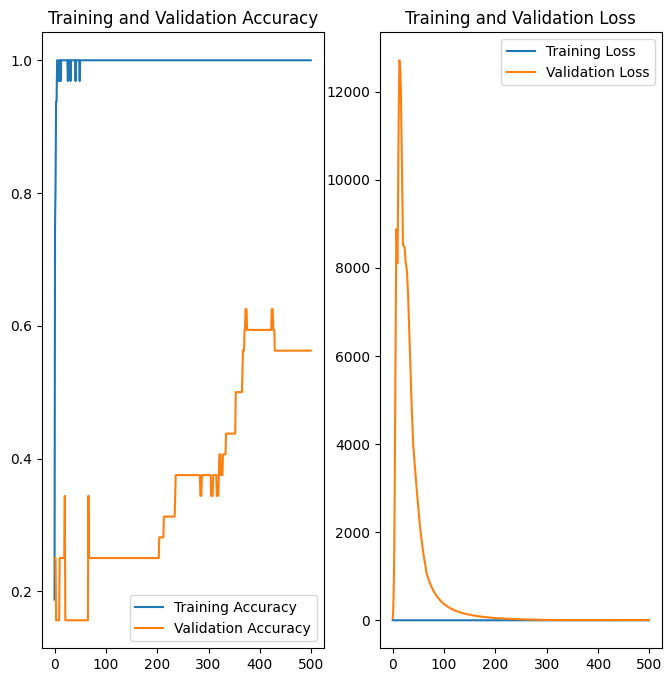

In [55]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(500), acc, label='Training Accuracy')
plt.plot(range(500), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(500), loss, label='Training Loss')
plt.plot(range(500), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()